In [1]:
Fraud_check=pd.read_csv("Fraud_check.csv")
Fraud_check.head()

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
Fraud_check["Taxable_Income"]=np.where(Fraud_check["Taxable.Income"]<= 30000,"Risky","Good")
Fraud_check.drop(columns="Taxable.Income",inplace=True)
Fraud_check

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [3]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Taxable_Income   600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [4]:
import sidetable

from termcolor import colored

In [5]:
Fraud_check.stb.freq(['Taxable_Income'], style=True, cum_cols=False)
#imbalanced data i will use oversample tech 

,Taxable_Income,Count,Percent
0,Good,476,79.33%
1,Risky,124,20.67%


In [6]:
x=Fraud_check.drop(columns="Taxable_Income")
y=Fraud_check[["Taxable_Income"]]


In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
os =  RandomOverSampler()


In [9]:
x1, y1 = os.fit_sample(x, y)

In [10]:
y.Taxable_Income.value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [11]:
y1.Taxable_Income.value_counts()

Risky    476
Good     476
Name: Taxable_Income, dtype: int64

In [12]:
Fraud_check1=pd.concat([x1,y1],axis=1)
Fraud_check1.shape

<IPython.core.display.Javascript object>

(952, 6)

In [13]:
print(colored("Information about data",attrs=['bold']))
print(Fraud_check1.info())
print("\n")
print(colored("Missing Value ",attrs=['bold']))
print(Fraud_check1.stb.missing())


Information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        952 non-null    object
 1   Marital.Status   952 non-null    object
 2   City.Population  952 non-null    int64 
 3   Work.Experience  952 non-null    int64 
 4   Urban            952 non-null    object
 5   Taxable_Income   952 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB
None


Missing Value 
                 Missing  Total  Percent
Undergrad              0    952      0.0
Marital.Status         0    952      0.0
City.Population        0    952      0.0
Work.Experience        0    952      0.0
Urban                  0    952      0.0
Taxable_Income         0    952      0.0


In [14]:
Q1=Fraud_check.quantile(.25)
Q3=Fraud_check.quantile(.75)
IQR=Q3-Q1
IQR

City.Population    83147.5
Work.Experience       16.0
dtype: float64

In [15]:
class outlier():
    
    def min_outlier(self,Q1,IQR):
        outlier_value=Q1-(1.5*IQR)
        return outlier_value  
    def max_outlier(self,Q3,IQR):
        outlier_value=Q3+(1.5*IQR)
        return outlier_value  
outlier=outlier()

In [16]:
print("City.Population Min Outlier{}" .format(outlier.min_outlier(66966.75,83147.5)))
print("City.Population Max Outlier{}" .format(outlier.max_outlier(150114.25,83147.5)))
print("Work.Experience Min Outlier{}" .format(outlier.min_outlier(8,16)))
print("Work.Experience Max Outlier{}" .format(outlier.max_outlier(24,16)))

City.Population Min Outlier-57754.5
City.Population Max Outlier274835.5
Work.Experience Min Outlier-16.0
Work.Experience Max Outlier48.0


In [17]:
Fraud_check[(Fraud_check["City.Population"]<-57754.5) |(Fraud_check["City.Population"]>274835.5)|(Fraud_check["Work.Experience"]<-16)|(Fraud_check["Work.Experience"]>48)]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income


In [18]:
print(colored("Mean",attrs=["bold"]))
print(Fraud_check.mean().round(2))
print("\n")
print(colored("Median",attrs=["bold"]))
print(Fraud_check.median().round(2))
print("\n")
print(colored("Mode",attrs=["bold"]))
print(Fraud_check.mode().round(2))
print("\n")
print(colored("Variance",attrs=["bold"]))
print(Fraud_check.var().round(2))
print("\n")
print(colored("SD",attrs=["bold"]))
print(Fraud_check.std().round(2))
print("\n")
print(colored("Skew",attrs=["bold"]))
print(Fraud_check.skew().round(2))
print("\n")
print(colored("Kurtosis",attrs=["bold"]))
print(Fraud_check.kurt().round(2))


Mean
City.Population    108747.37
Work.Experience        15.56
dtype: float64


Median
City.Population    106493.5
Work.Experience        15.0
dtype: float64


Mode
  Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0       YES         Single            57194             10.0   YES   
1       NaN            NaN           162777              NaN   NaN   

  Taxable_Income  
0           Good  
1            NaN  


Variance
City.Population    2.485030e+09
Work.Experience    7.818000e+01
dtype: float64


SD
City.Population    49850.08
Work.Experience        8.84
dtype: float64


Skew
City.Population    0.13
Work.Experience    0.02
dtype: float64


Kurtosis
City.Population   -1.12
Work.Experience   -1.17
dtype: float64


C:\Users\Sanchi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>



stats=0.9534081816673279, p=7.859946417679287e-13


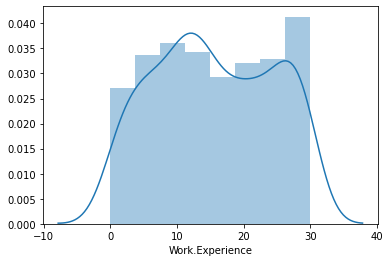

In [19]:
sns.distplot(Fraud_check["Work.Experience"])
print("\n")
import scipy
stat, p=scipy.stats.shapiro(Fraud_check["Work.Experience"])
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less than 0.05

<IPython.core.display.Javascript object>

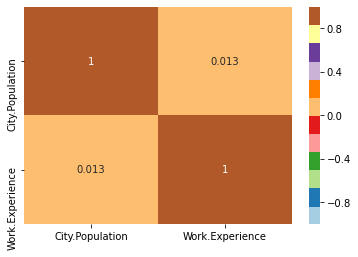

In [20]:
sns.heatmap(Fraud_check.corr(),vmin=-1, vmax=1, cmap='Paired',annot=True)

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV,cross_val_predict,cross_validate
from sklearn.tree import DecisionTreeClassifier

In [22]:
x1["Undergrad"]=np.where(x1["Undergrad"]=="yes",1,0)
x1["Urban"]=np.where(x1["Urban"]=="yes",1,0)
x1.drop(columns="Marital.Status",inplace=True)
x1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Undergrad,City.Population,Work.Experience,Urban
0,0,50047,10,0
1,0,134075,18,0
2,0,160205,30,0
3,0,193264,15,0
4,0,27533,28,0
...,...,...,...,...
947,0,176891,27,0
948,0,157421,10,0
949,0,173091,14,0
950,0,63622,17,0


In [25]:
import sklearn.model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV,cross_val_predict,cross_validate
from sklearn.tree import DecisionTreeClassifier 

In [36]:
xtrain,xtest,ytrain,ytest=sklearn.model_selection.train_test_split(x1,y1,train_size=.20,random_state=3)


,Undergrad,City.Population,Work.Experience,Urban
629,0,79683,26,0
552,0,109191,5,0
656,0,39360,10,0
907,0,103226,29,0
579,0,125112,7,0
...,...,...,...,...
90,0,101232,29,0
307,0,31819,25,0
341,0,83900,8,0
380,0,197699,2,0


In [29]:
gridsearch=GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={
            'criterion': ('gini', 'entropy'),
            'max_depth': [1, 2,3,4,5,6,7,12,15,20,None],
            'min_samples_split':[1, 2,3,4,5,6,7],
            'min_samples_leaf':[1,2,3,4,5,6,7],
            'max_features':(None,'auto','sqrt','log2'),
            },
        cv=10, verbose=0,n_jobs=-1)

In [39]:
grid_result=gridsearch.fit(xtrain, ytrain)
best_params = grid_result.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [40]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=3,min_samples_split=5,min_samples_leaf=2,max_features="log2")
model1

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=2, min_samples_split=5, random_state=3)

In [41]:
model1=model1.fit(xtrain,ytrain)

In [47]:
predict_train=model1.predict(xtrain)


In [48]:
actual_train=ytrain

In [52]:
from sklearn import metrics
print("Model Accuracy On Training Data :",metrics.accuracy_score(actual_train, predict_train).round(2))

Model Accuracy On Training Data : 0.85


In [53]:
predict_test=model1.predict(xtest)

In [54]:
actual_test=ytest

In [55]:
print("Model Accuracy On Test Data :",metrics.accuracy_score(actual_test, predict_test).round(2))

Model Accuracy On Test Data : 0.6


In [ ]:
# we can say that it is a overfitting model 
# USe Random Forset for this 

In [61]:
predict=pd.Series(predict_test)
actual=pd.Series(actual_test.Taxable_Income)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
pd.crosstab(actual, predict)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,206,178
Risky,118,113


In [72]:
score2=cross_val_score(model1,x1,y1,cv=8).round(2)
score2.mean().round(2)

0.79

In [73]:
predict_cross=cross_val_predict(model1, x1, y1, cv=8)
predict_cross

array(['Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Goo

In [74]:
predict2=pd.Series(predict_cross)

<IPython.core.display.Javascript object>

In [75]:
Actual=pd.Series(y1.Taxable_Income)

<IPython.core.display.Javascript object>

In [76]:
pd.crosstab(Actual,predict2)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,336,140
Risky,60,416


In [140]:
print("Model Accuracy by CV :",metrics.accuracy_score(Actual, predict2).round(2))

Model Accuracy by CV : 0.79


In [71]:
# cv is my final model 

In [79]:
from sklearn import tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

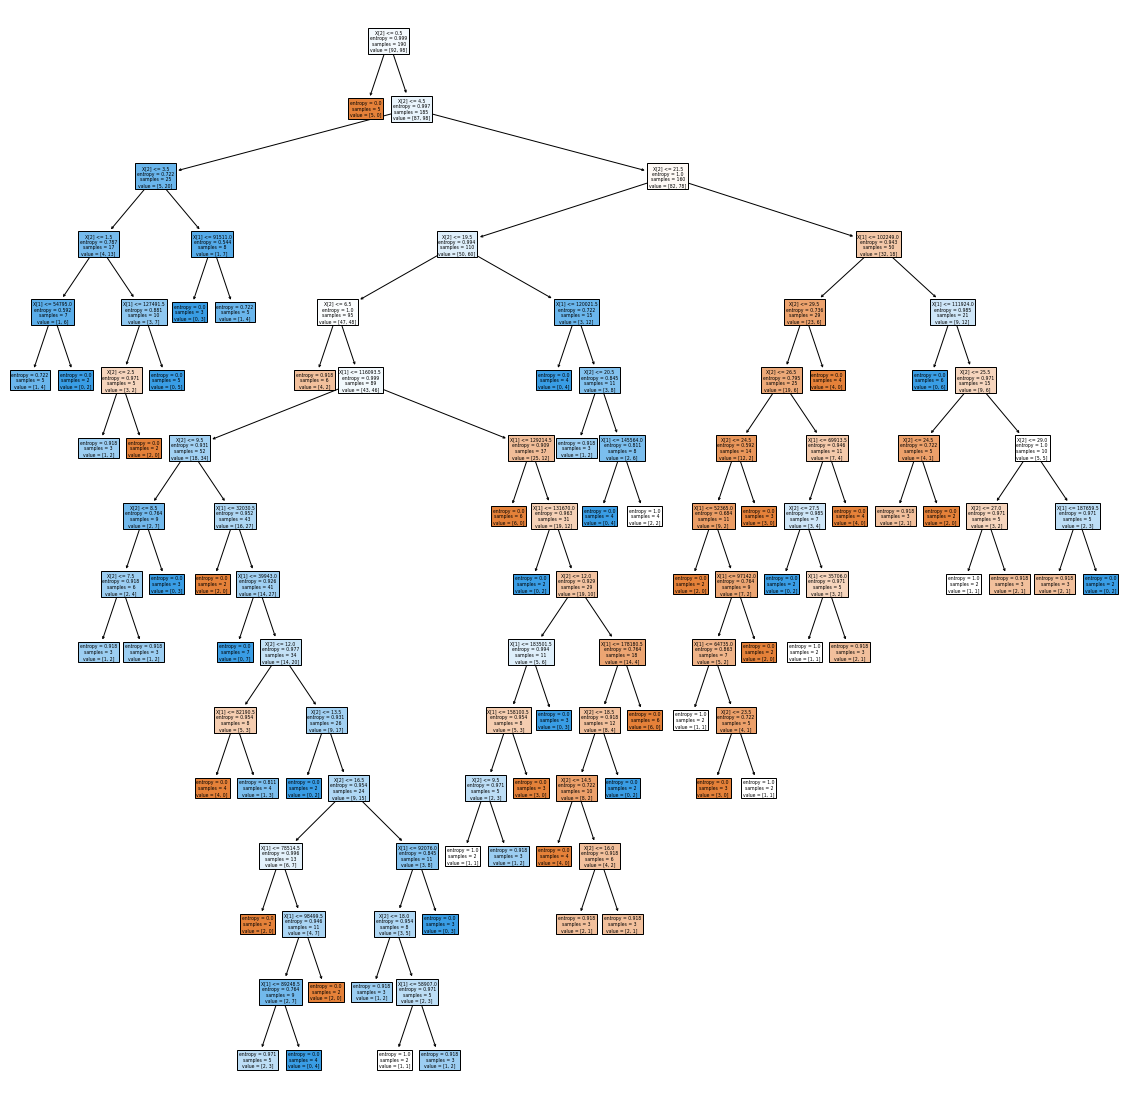

In [85]:
plt.figure(figsize=(20,20))
tree.plot_tree(model1,filled=True) 
plt.show()

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
gridsearch=GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'criterion': ('gini', 'entropy'),
            'n_estimators':[100,50,150,200],
            'max_depth': [1, 2,3,4,5,None],
            'min_samples_split':[1, 2,3,4,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':(None,'auto','sqrt','log2'),
            },
        cv=3, verbose=0,n_jobs=-1)

In [103]:
grid_result=gridsearch.fit(xtrain, ytrain)
best_params = grid_result.best_params_
best_params

C:\Users\Sanchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

In [112]:
model1_RF=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=4,random_state=3,min_samples_split=5,min_samples_leaf=4,max_features="sqrt")
model1_RF

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50, random_state=3)

In [120]:
ytrain=ytrain.Taxable_Income.ravel()

In [122]:
model1_RF=model1_RF.fit(xtrain,ytrain)

In [124]:
model1_RF.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=218175338),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=303761048),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=893988089),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=1460070019),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=1249426360),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samples_split=5, random_state=521102280),
 DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                        min_samp

In [146]:
predict_train_RF=model1_RF.predict(xtrain)


In [147]:
print("Model Accuracy On Training Data :",metrics.accuracy_score(actual_train, predict_train_RF).round(2))

Model Accuracy On Training Data : 0.76


In [148]:
predict_test_RF=model1_RF.predict(xtest)

In [149]:
print("Model Accuracy On Test Data :",metrics.accuracy_score(actual_test, predict_test_RF).round(2))

Model Accuracy On Test Data : 0.55


In [150]:
predict_RF=pd.Series(predict_test_RF)


<IPython.core.display.Javascript object>

In [151]:
pd.crosstab(Actual,predict_RF)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,178,298
Risky,109,177


In [152]:
y1=y1.Taxable_Income.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'Taxable_Income'

In [158]:
score2_RF=cross_val_score(model1_RF,x1,y1,cv=7).round(2)
#score2_RF
score2_RF.mean().round(2)

0.61

In [159]:
predict_cross=cross_val_predict(model1_RF, x1, y1, cv=8)
predict_cross

array(['Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good',

In [160]:
print("Model Accuracy by CV :",metrics.accuracy_score(Actual, predict_cross).round(2))

Model Accuracy by CV : 0.6


In [161]:
model2_RF=RandomForestClassifier()
model2_RF

RandomForestClassifier()

In [162]:
model1_RF=model2_RF.fit(xtrain,ytrain)

In [163]:
model1_RF.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2072802248),
 DecisionTreeClassifier(max_features='auto', random_state=72806576),
 DecisionTreeClassifier(max_features='auto', random_state=1260188886),
 DecisionTreeClassifier(max_features='auto', random_state=1240543008),
 DecisionTreeClassifier(max_features='auto', random_state=298795636),
 DecisionTreeClassifier(max_features='auto', random_state=339066131),
 DecisionTreeClassifier(max_features='auto', random_state=669149180),
 DecisionTreeClassifier(max_features='auto', random_state=2030638791),
 DecisionTreeClassifier(max_features='auto', random_state=1083993014),
 DecisionTreeClassifier(max_features='auto', random_state=1046014045),
 DecisionTreeClassifier(max_features='auto', random_state=1080901350),
 DecisionTreeClassifier(max_features='auto', random_state=778549820),
 DecisionTreeClassifier(max_features='auto', random_state=1615908713),
 DecisionTreeClassifier(max_features='auto', random_state=636134522),
 DecisionTree

In [164]:
predict_train_RF=model2_RF.predict(xtrain)


In [165]:
print("Model Accuracy On Training Data :",metrics.accuracy_score(actual_train, predict_train_RF).round(2))

Model Accuracy On Training Data : 1.0


In [167]:
predict_test_RF=model2_RF.predict(xtest)

In [168]:
print("Model Accuracy On Test Data :",metrics.accuracy_score(actual_test, predict_test_RF).round(2))

Model Accuracy On Test Data : 0.61


In [169]:
predict_RF=pd.Series(predict_test_RF)


<IPython.core.display.Javascript object>

In [170]:
pd.crosstab(Actual,predict_RF)

<IPython.core.display.Javascript object>

col_0,Good,Risky
Taxable_Income,,
Good,190,286
Risky,124,162


In [171]:
score2_RF=cross_val_score(model2_RF,x1,y1,cv=7).round(2)
#score2_RF
score2_RF.mean().round(2)

0.87

In [172]:
predict_cross=cross_val_predict(model2_RF, x1, y1, cv=8)
predict_cross

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Goo

In [173]:
print("Model Accuracy by CV :",metrics.accuracy_score(Actual, predict_cross).round(2))

Model Accuracy by CV : 0.87


In [174]:
# so atlast we will finallize cv 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

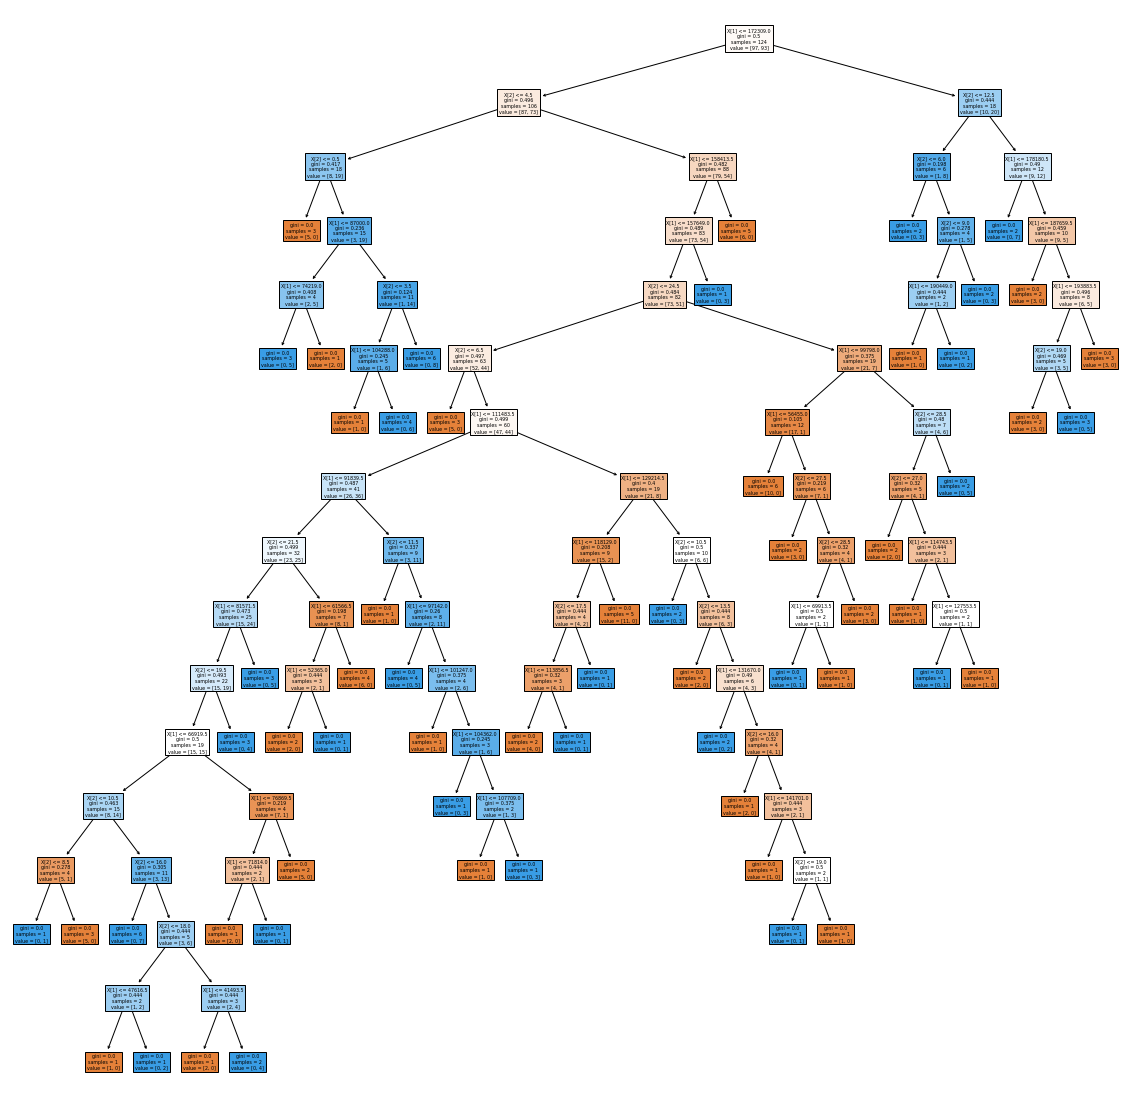

In [177]:
plt.figure(figsize=(20,20))

tree.plot_tree(model2_RF.estimators_[1],filled=True) 
plt.show()